# Özgür Özer

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

**Exercise 4.1**: Prepare a file with a function called fence such that given two strings as arguments: string_1 = "aaa" and string_2 = "bbb", the output is aaa_bbb_aaa. In the same file define a second function called outer such that given a string returns another string made up of just the first and last characters of its input. Therefore if the input is Betis the function output should be Bs. Include in both cases a docstring with a brief function description and an example. Load the functions from the file and check what is the output of this statement: print outer(fence('carbon', '+')).

In [2]:
from ex4lib import fence, outer

In [3]:
print(outer(fence('carbon', '+')))

cn


**Exercise 4.2**: Write a function that generates a random password. The password should have a random length of between 10 and 12 random characters from positions 33 to 122 in the ASCII table. Your function will not take any parameters and will return the password as its only result. Make another function that checks if the password has at least two lowcase, two uppercase, and two digit characters and the output of this function will be a compliant password and the number of times has been run the original function to obtain the compliant password.

In [4]:
def rand_passwd():
    return "".join(np.vectorize(chr)(np.random.randint(33, 123, np.random.randint(10,13))))

In [5]:
import random
def rand_passwd():
    return "".join(map(chr, random.choices(range(33,123), k = random.randint(10, 13))))

In [6]:
rand_passwd()

'gJGpx4Fe#l<'

In [7]:
def passwd_check(passwd):
    iteration = 0
    while True:
        ints = np.array([ord(i) for i in passwd])
        hasLowerCase = np.count_nonzero(np.logical_and(96<ints, ints<123)) >= 2
        hasUpperCase = np.count_nonzero(np.logical_and(64<ints, ints<91)) >= 2
        hasDigits = np.count_nonzero(np.logical_and(47<ints, ints<58)) >= 2
        if hasLowerCase and hasUpperCase and hasDigits: break
        passwd = rand_passwd()
        iteration += 1
    return passwd, iteration

In [8]:
from string import ascii_uppercase as ap, ascii_lowercase as al, digits as d
def passwd_check(passwd):
    iteration = 0
    while not (sum(1 for i in passwd if i in ap) > 2 and sum(1 for i in passwd if i in al) > 2 and sum(1 for i in passwd if i in d) > 2):
        passwd = rand_passwd()
        iteration += 1
    return passwd, iteration

In [9]:
passwd_check(rand_passwd())

('PK#yh9Ze98ks3', 11)

**Exercise 4.3**: Gaussian distributed data are frequently normalized to have a mean value equal to zero and a standard deviation equal to one substracting the actual mean value and dividing by the standard deviation of the dataset. Making use of the mean and std NumPy methods, define a function that takes as an argument a data vector, a new mean value, and a new standard deviation value and transforms the original set of data to a new set with a the new mean as its average value and with a dispersion given by the new standard deviation value. By default the function should standardize the data to mean = 0 and sdev = 1.

In [10]:
def scale_and_translate(data, mean=0, std=1):
    if std < 0: raise ValueError("Standard deviation cannot be less than 0")
    return (data - data.mean()) / data.std() * std + mean 

In [11]:
data = scale_and_translate(np.random.randn(1000) * 30 + 25, -20, 50)

In [12]:
data.mean()

-20.0

In [13]:
data.std()

50.0

**Exercise 4.4**: You can approximate the cubic root of a number a as x(n+1) = 2 x(n)/3 + a/(3 x(n)²) with x(0) = a/3. Prepare a function that computes the cubic root of a given root until the difference between successive computed values is less than a given threshod (e.g. 1E-8) and compare the obtained value and the value of x0**(1/3).

In [14]:
def cube_root(a, tol):
    x0, x1 = a/3, 2 * a / 3 + a / (3 * (a / 3) ** 2)
    while np.abs(x0 - x1) > tol: x0, x1 = x1, 2 * x0 / 3 + a / (3 * x0 ** 2) # python evals right side first then assigns
    return x1

In [15]:
np.abs(cube_root(33,1e-7) - 33 ** (1/3))

8.881784197001252e-15

**Exercise 4.5**: Define a function that reads out temperature data from the sample Cyprus dataset and prepare graphics. Prepare a function with helpful docstring and comments that for given list of file names prepares a plot with three columns for each data file: the first including the max, min and mean monthly temperatures, the second the max, min, and mean annual temperatures, and the third depicting the monthly temperatures for all years.

In [16]:
def graph(*files):
    """
    for given list of file names prepares a plot with three columns for each data file: 
    the first including the max, min and mean monthly temperatures, 
    the second the max, min, and mean annual temperatures, and 
    the third depicting the monthly temperatures for all years.
    """
    figs, axs = plt.subplots(len(files), 3, figsize=(20,5*len(files)), sharey=True, constrained_layout=True)
    for i,file in enumerate(files):
        dat = np.genfromtxt("TData/" + file.strip(), delimiter=",", skip_header=1)
        axs[i,0].plot(dat[:, 1:].max(axis=0), label="Max")
        axs[i,0].plot(dat[:, 1:].min(axis=0), label="Min")
        axs[i,0].plot(dat[:, 1:].mean(axis=0), label="Mean")
        axs[i,0].set_title(file.split("_")[1] + " Monthly Max, Min, and Mean")
        axs[i,0].legend(loc="best")
        axs[i,1].plot(dat[:,0], dat[:, 1:].max(axis=1), label="Max")
        axs[i,1].plot(dat[:,0], dat[:, 1:].min(axis=1), label="Min")
        axs[i,1].plot(dat[:,0], dat[:, 1:].mean(axis=1), label="Mean")
        axs[i,1].set_title(file.split("_")[1] + " Annual Max, Min, and Mean")
        axs[i,1].legend(loc="best")
        axs[i,2].set_title(file.split("_")[1] + " Monthly Temperature fo All Years")
        for j in range(len(dat[:,0])):
            axs[i,2].plot(dat[j, 1:])

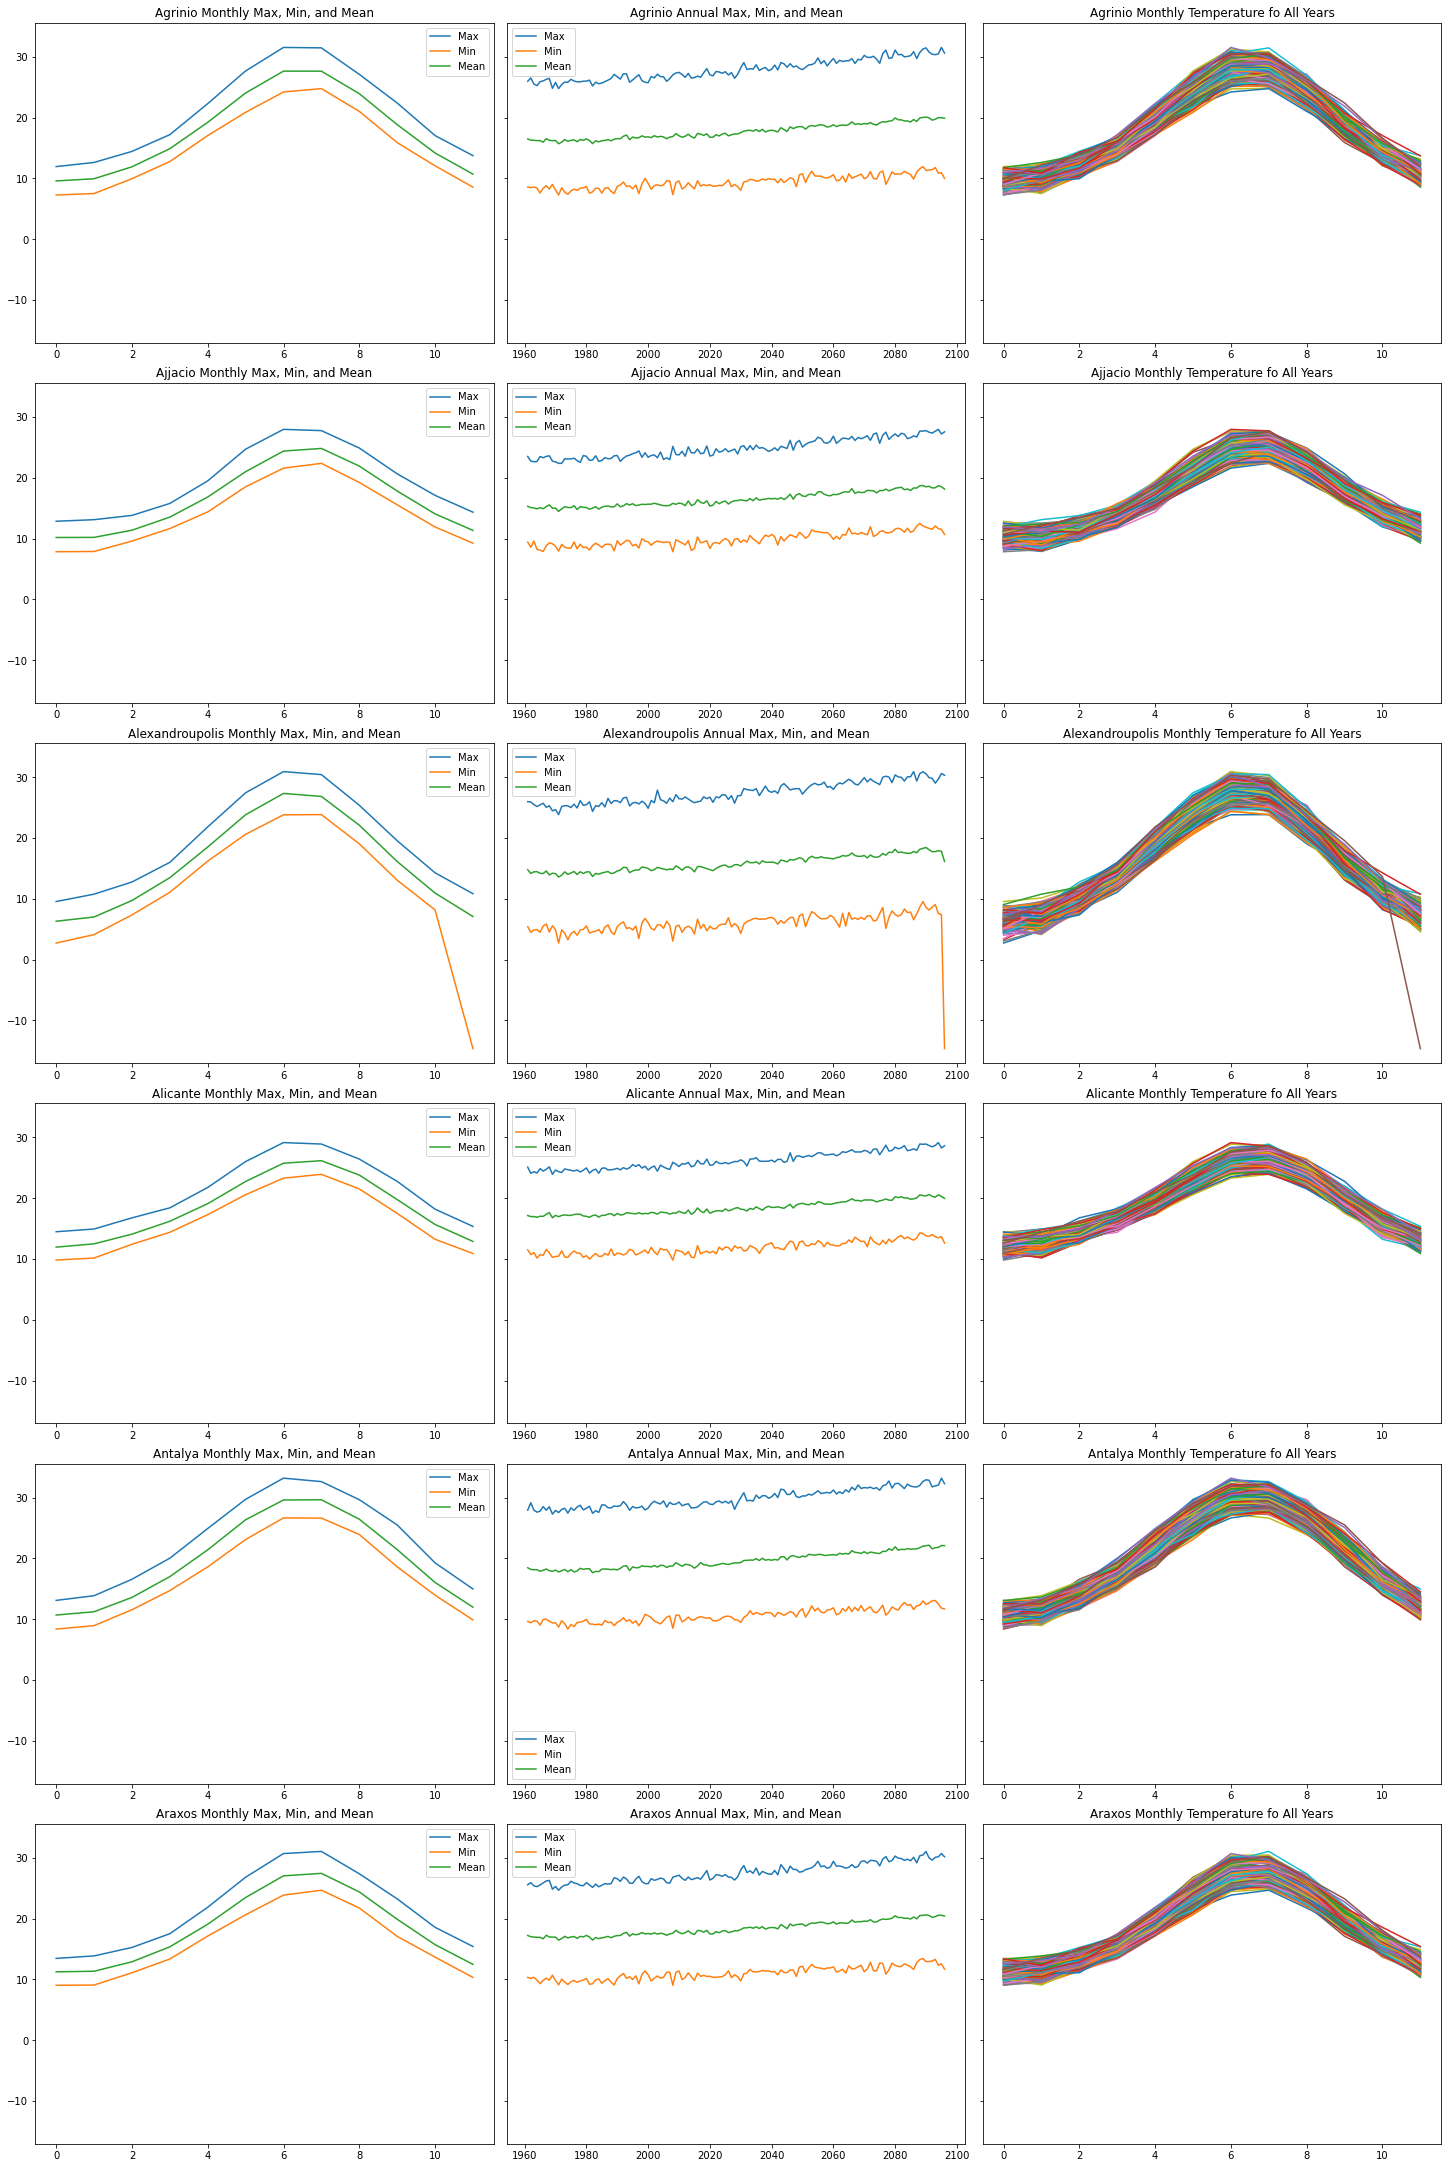

In [17]:
graph("T_Agrinio_EM.csv", "T_Ajjacio_EM.csv", "T_Alexandroupolis_EM.csv", "T_Alicante_EM.csv", "T_Antalya_EM.csv", "T_Araxos_EM.csv")

**Exercise 4.6**: The sieve of Erastosthenes is an ancient algorithm (approx. 3rd century BCE) to find all prime numbers up to a given limit. The implementation of this algorithm in pseudocode is as follows:
algorithm Sieve of Eratosthenes is input: an integer n > 1. output: all prime numbers from 2 through n.

In [18]:
def erastosthenes(n):
    if n < 2: raise ValueError("n should be larger than one")
    A = np.array([True if i > 1 else False for i in range(n+1)])
    for i in range(2, int(np.ceil(n ** .5))):
        if A[i]: A[i**2:n+1:i] = False
    return np.where(A == True)[0]

In [19]:
erastosthenes(400)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397])